<a href="https://colab.research.google.com/github/dtnovak26/ME239/blob/homeworkUploads/ME239_HW04_novak104.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(lecture04:homework)=
# Homework 4

## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you can either:
    
    - Type the answer using the built-in latex capabilities. In this case, simply export the notebook as a pdf and upload it on gradescope; or
    - You can print the notebook (after you are done with all the code), write your answers by hand, scan, turn your response to a single pdf, and upload on gradescope.

+ The total homework points are 100. Please note that the problems are not weighed equally.

```{note}
+ Please match all the pages corresponding to each of the questions when you submit on gradescope.
```

## Student details

+ **First Name:** Drew
+ **Last Name:** Novak
+ **Email:** novak104@purdue.edu

Let me set you up with some nice code for plotting and downloading files.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', 'svg')

/tmp/ipython-input-367591302.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina', 'svg')


## Problem 1 - Visual analysis of a variable-speed compressor experiment

In this problem you are going to need [this](https://raw.githubusercontent.com/PurdueMechanicalEngineering/me-297-intro-to-data-science/master/data/compressor_data.xlsx) dataset. The dataset was kindly provided to us by [Professor Davide Ziviani](https://scholar.google.com/citations?user=gPdAtg0AAAAJ&hl=en).
As before, you can either put it on your Google drive or just download it with the code segment below:

In [ ]:
!curl -O 'https://raw.githubusercontent.com/PurdueMechanicalEngineering/me-239-intro-to-data-science/master/data/compressor_data.xlsx'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 14771  100 14771    0     0  94319      0 --:--:-- --:--:-- --:--:-- 94685


The data are part of a an experimental study of a variable speed reciprocating compressor.
The experimentalists varied two temperatures $T_e$ and $T_c$ (both in degrees C) and they measured various other quantities.
Your goal is to understand the experimental design and develop some intuition of the map between $T_e$ and $T_c$ and measured Capacity and Power (both in W).
Answer the following questions.

+ Do the scatter plot of $T_e$ and $T_c$. This will reveal the experimental design picked by the experimentalists. Make sure you label the axes correctly. Hint: These are columns `T_e` and `T_c` of the data frame `data`.

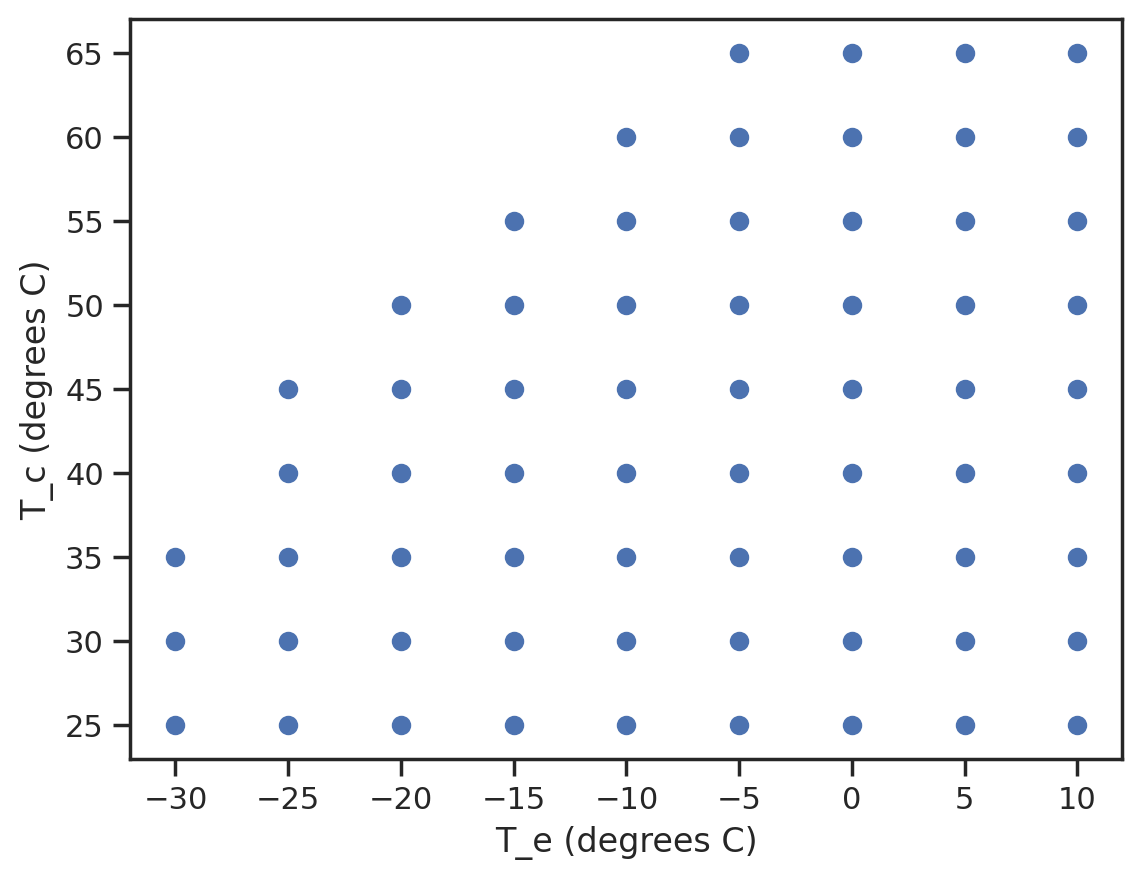

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# I ended up reading the data from the excel sheet that I downloaded to my google drive
temp_price = pd.read_excel('compressor_data.xlsx')

fig, ax = plt.subplots()
ax.scatter(temp_price['T_e'], temp_price['T_c'])
ax.set_xlabel('T_e (degrees C)')
ax.set_ylabel('T_c (degrees C)')
plt.show()

+ Is there a gap in the experimental design? If yes, why do you think they have a gap?

Iy looks like the data point at T_e = -30, T_c = 40 is missing. It could have been difficult to achieve these temperatures or they simply missed the data collection.

+ Do the scatter plot between `T_e` and `Capacity`.

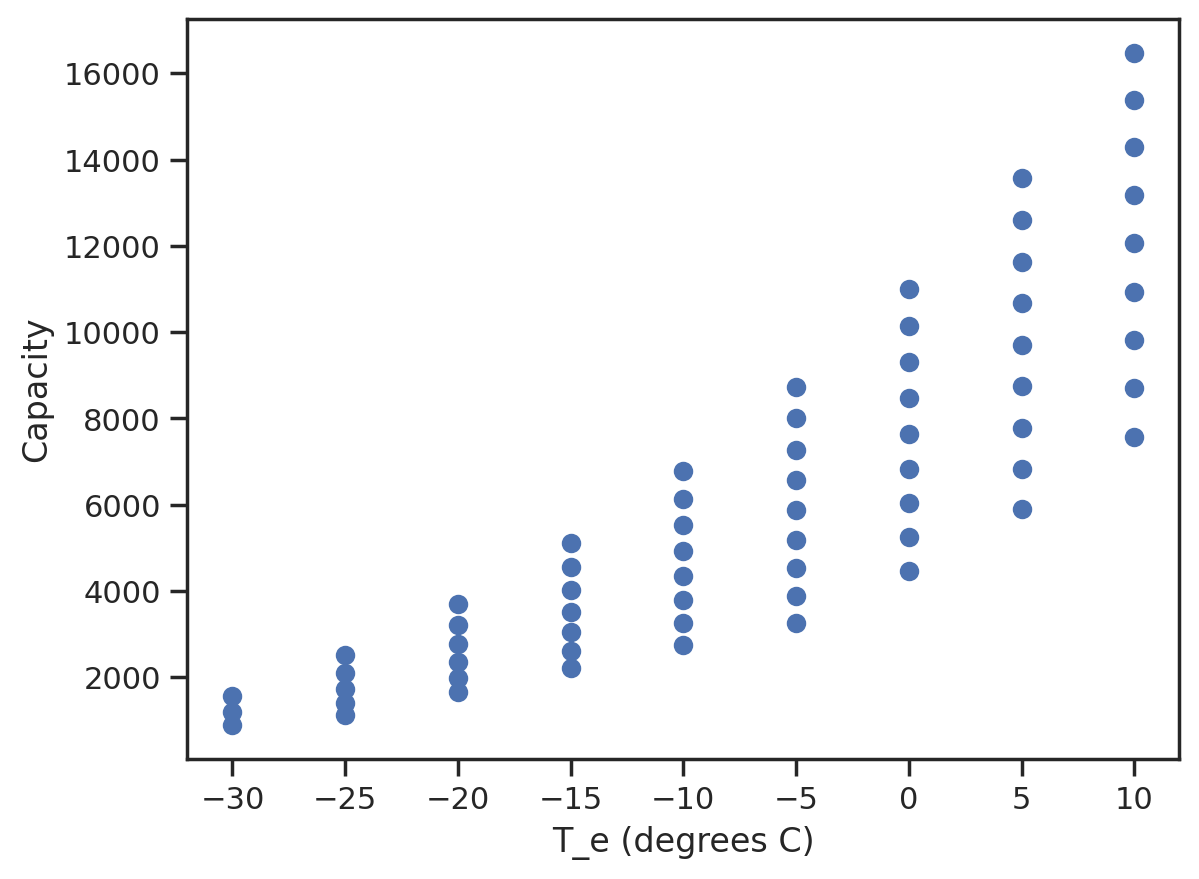

In [ ]:
fig, ay = plt.subplots()
ay.scatter(temp_price['T_e'], temp_price['Capacity'])
ay.set_xlabel('T_e (degrees C)')
ay.set_ylabel('Capacity')
plt.show()

+ Do the scatter plot between `T_c` and `Capacity`.

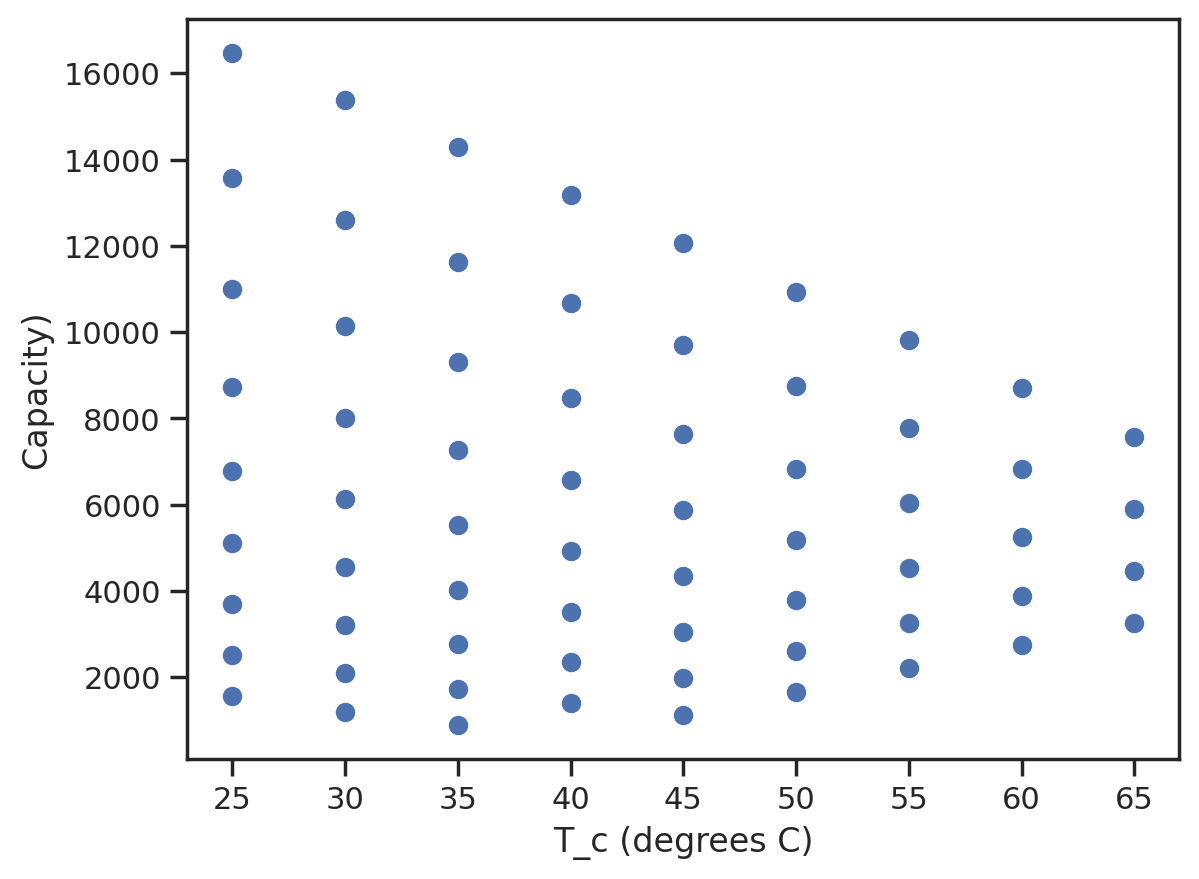

In [ ]:
fig, tcCap = plt.subplots()
tcCap.scatter(temp_price['T_c'], temp_price['Capacity'])
tcCap.set_xlabel('T_c (degrees C)')
tcCap.set_ylabel('Capacity)')
plt.show()

+ Do the scatter plot between `T_e` and `Power`.

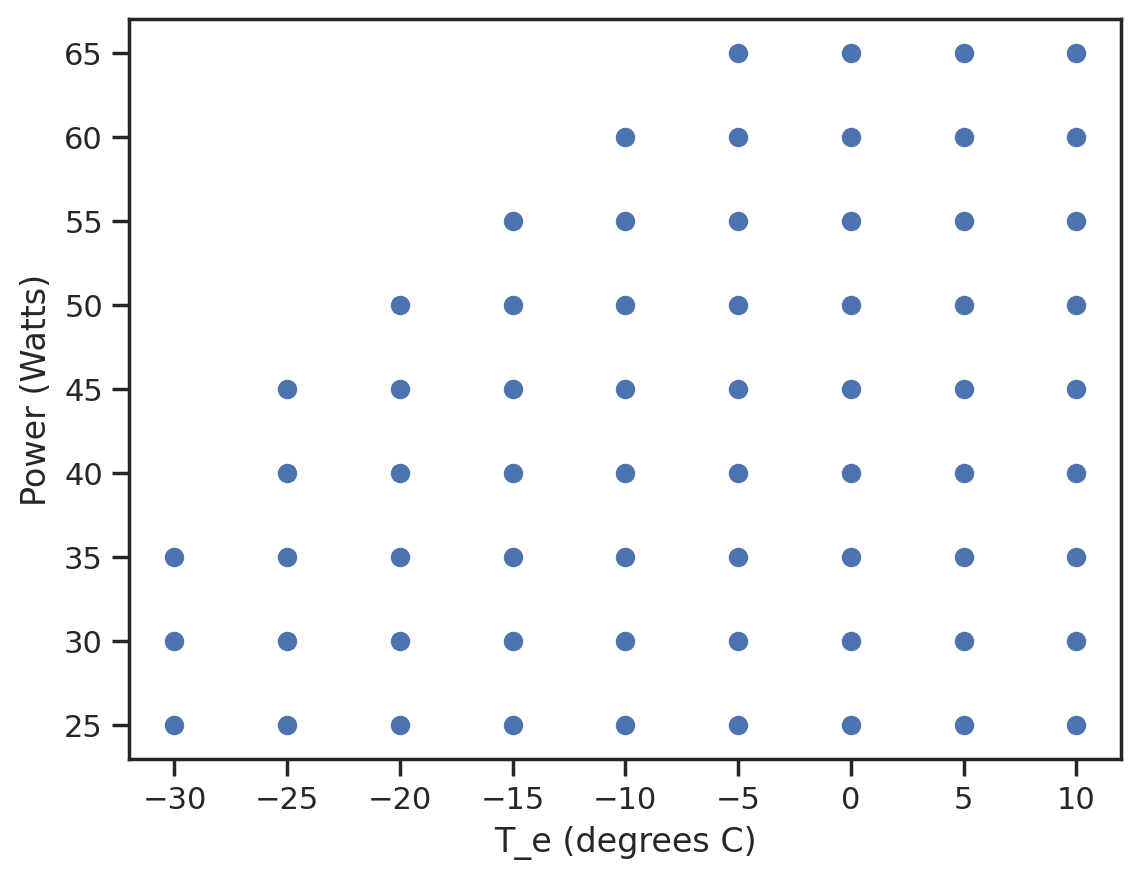

In [ ]:
# your code here
fig, tePow = plt.subplots()
tePow.scatter(temp_price['T_e'], temp_price['T_c'])
tePow.set_xlabel('T_e (degrees C)')
tePow.set_ylabel('Power (Watts)')
plt.show()

+ Do the scatter plot between `T_c` and `Power`.

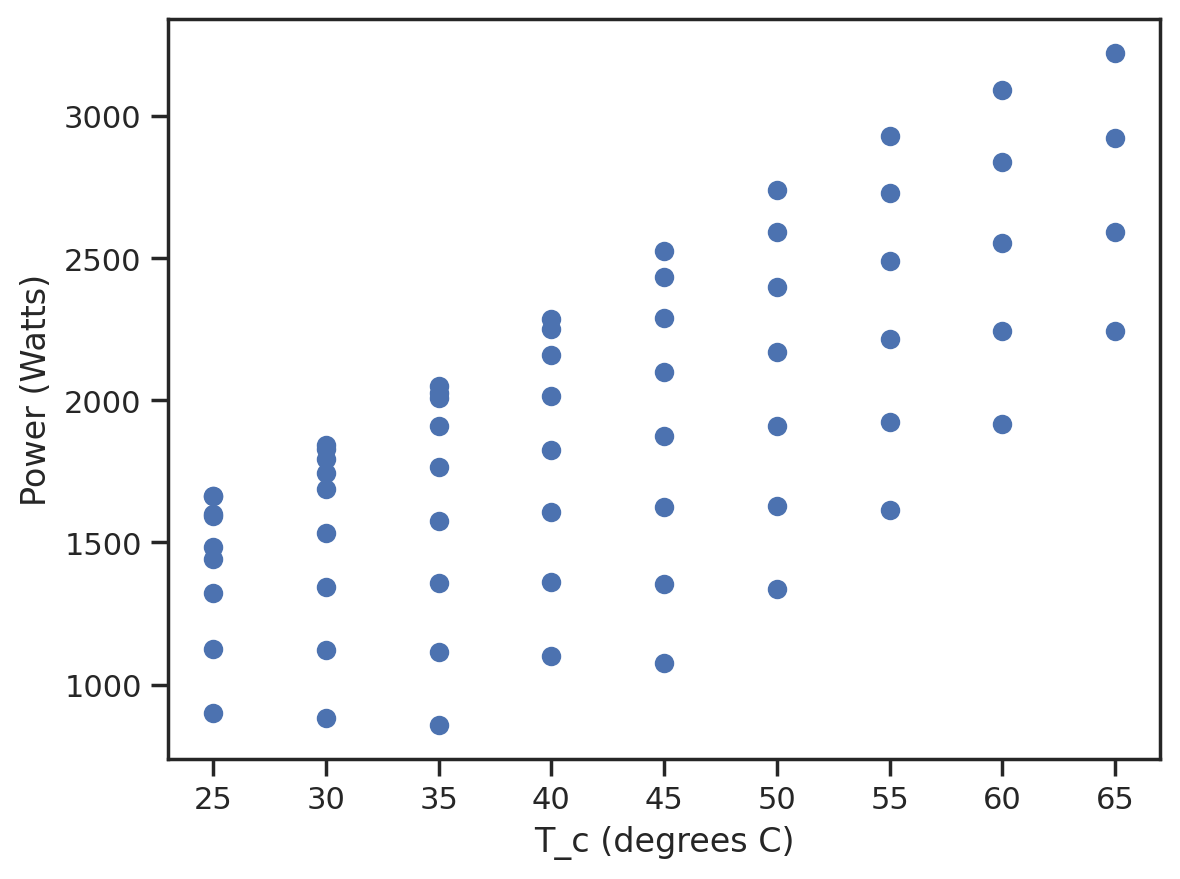

In [ ]:
fig, tcPow = plt.subplots()
tcPow.scatter(temp_price['T_c'], temp_price['Power'])
tcPow.set_xlabel('T_c (degrees C)')
tcPow.set_ylabel('Power (Watts)')
plt.show()

+ We are lucky that we only have two experimental control variables because can do a bit more thing with scatter. You can color each point in the scatter plot according to a scale that follows an output variable. Let me show you what I mean by doing the plot for the `Capacity`.

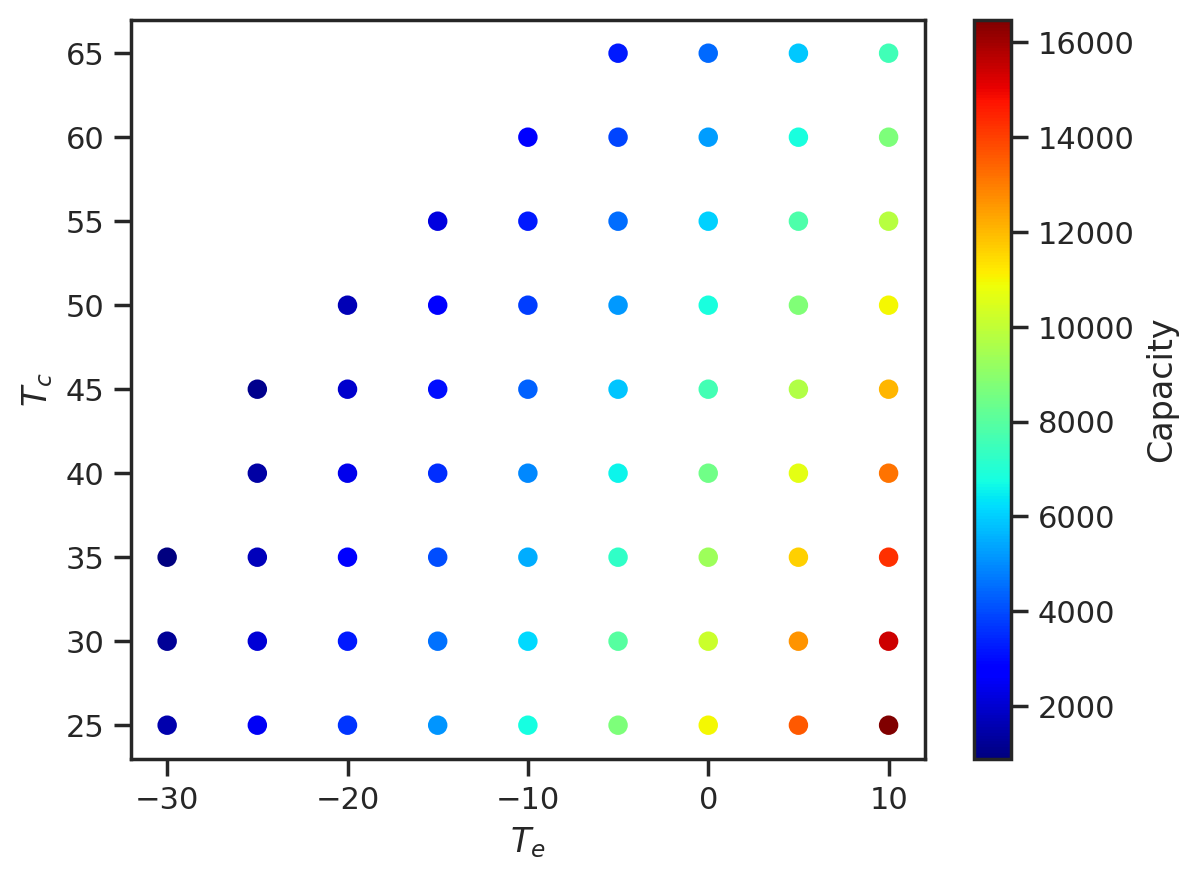

In [ ]:
from matplotlib import cm
fig, ax = plt.subplots()
cs = ax.scatter(temp_price['T_e'], temp_price['T_c'], # So far a standard scatter plot
                c=temp_price['Capacity'], # This is telling matplotlib what the color
                                 # of the points should be
                cmap=cm.jet      # This is saying to use the jet colormap
                                 # (blue = smallest values, red = highest values)
               )
plt.colorbar(cs, label='Capacity')   # This gives us a colorbar
ax.set_xlabel('$T_e$')
ax.set_ylabel('$T_c$');

Now repeat the same thing for the `Power`:

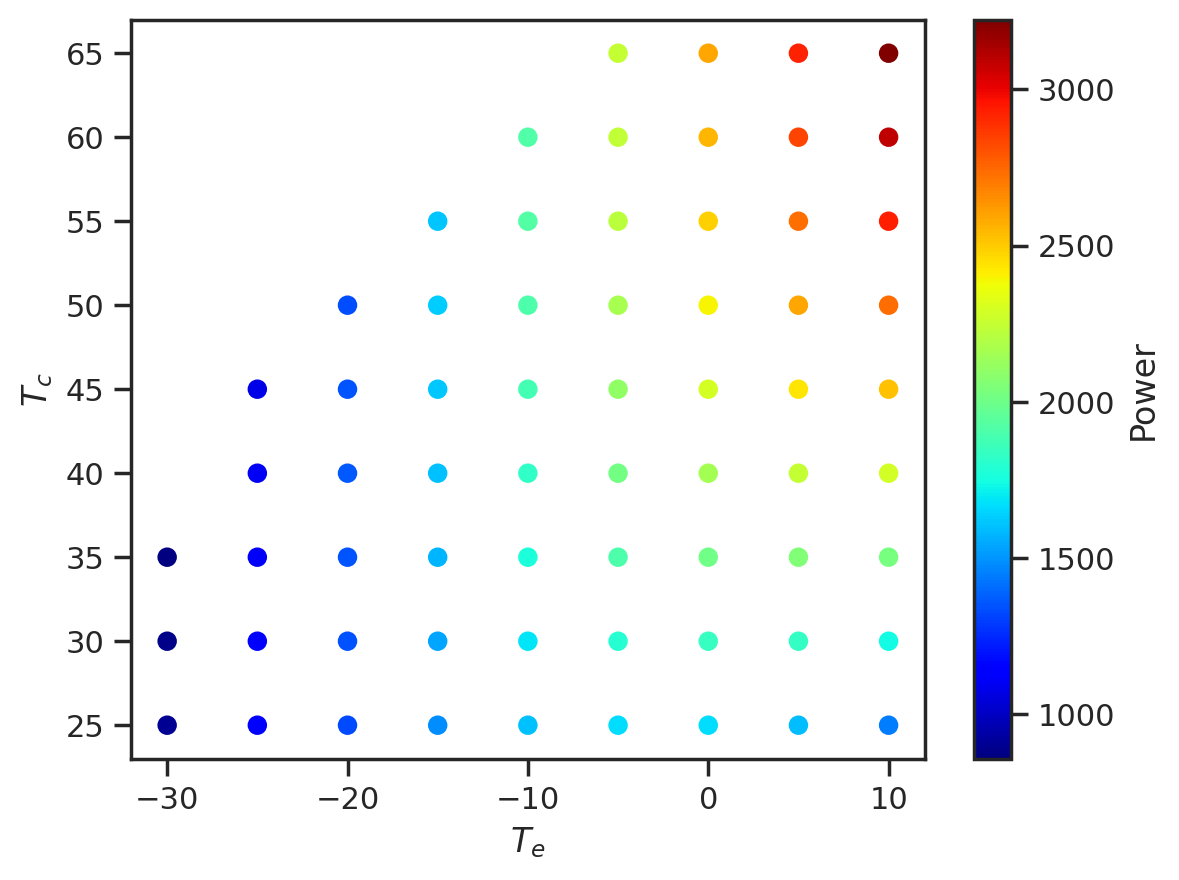

In [ ]:
from matplotlib import cm
fig, ax = plt.subplots()
cs = ax.scatter(temp_price['T_e'], temp_price['T_c'], # So far a standard scatter plot
                c=temp_price['Power'], # This is telling matplotlib what the color
                                 # of the points should be
                cmap=cm.jet      # This is saying to use the jet colormap
                                 # (blue = smallest values, red = highest values)
               )
plt.colorbar(cs, label='Power')   # This gives us a colorbar
ax.set_xlabel('$T_e$')
ax.set_ylabel('$T_c$');

## Problem 2 - Visual analysis of an airfoil experiment

In this problem, you are going to repeat what you did in Problem 1, but without my guidance!

The dataset we are going to use is the [Airfoil Self-Noise Data Set](https://archive.ics.uci.edu/dataset/291/airfoil+self+noise)
From this reference, the descreption of the dataset is as follows:

> The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. The span of the airfoil and the observer position were the same in all of the experiments.
>
> Attribute Information:
> This problem has the following inputs:
> 1. Frequency, in Hertzs.
> 2. Angle of attack, in degrees.
> 3. Chord length, in meters.
> 4. Free-stream velocity, in meters per second.
> 5. Suction side displacement thickness, in meters.

> The only output is:
> 6. Scaled sound pressure level, in decibels.

Before we start, let's download and load the data.
I am going to put them in a dataframe for you.

In [ ]:
!curl -O 'https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat'
import numpy as np
import pandas as pd
raw_data = np.loadtxt('airfoil_self_noise.dat')
df = pd.DataFrame(raw_data,
                  columns=['Frequency', 'Angle_of_attack', 'Chord_length',
                            'Velocity', 'Suction_thickness', 'Sound_pressure'])
df

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 59984    0 59984    0     0   449k      0 --:--:-- --:--:-- --:--:--  450k


Frequency  Angle_of_attack  Chord_length  Velocity  Suction_thickness  \
0         800.0              0.0        0.3048      71.3           0.002663   
1        1000.0              0.0        0.3048      71.3           0.002663   
2        1250.0              0.0        0.3048      71.3           0.002663   
3        1600.0              0.0        0.3048      71.3           0.002663   
4        2000.0              0.0        0.3048      71.3           0.002663   
...         ...              ...           ...       ...                ...   
1498     2500.0             15.6        0.1016      39.6           0.052849   
1499     3150.0             15.6        0.1016      39.6           0.052849   
1500     4000.0             15.6        0.1016      39.6           0.052849   
1501     5000.0             15.6        0.1016      39.6           0.052849   
1502     6300.0             15.6        0.1016      39.6           0.052849   

      Sound_pressure  
0            126.201  
1            125.201  
2            125.951  
3            127.591  
4            127.461  
...              ...  
1498         110.264  
1499         109.254  
1500         106.604  
1501         106.224  
1502         104.204  

[1503 rows x 6 columns]

+ Do the histogtrams of all variables. Use as many code segments you need below to plot the histogram of each variable in a different plot. Make sure you label the axes correctly.

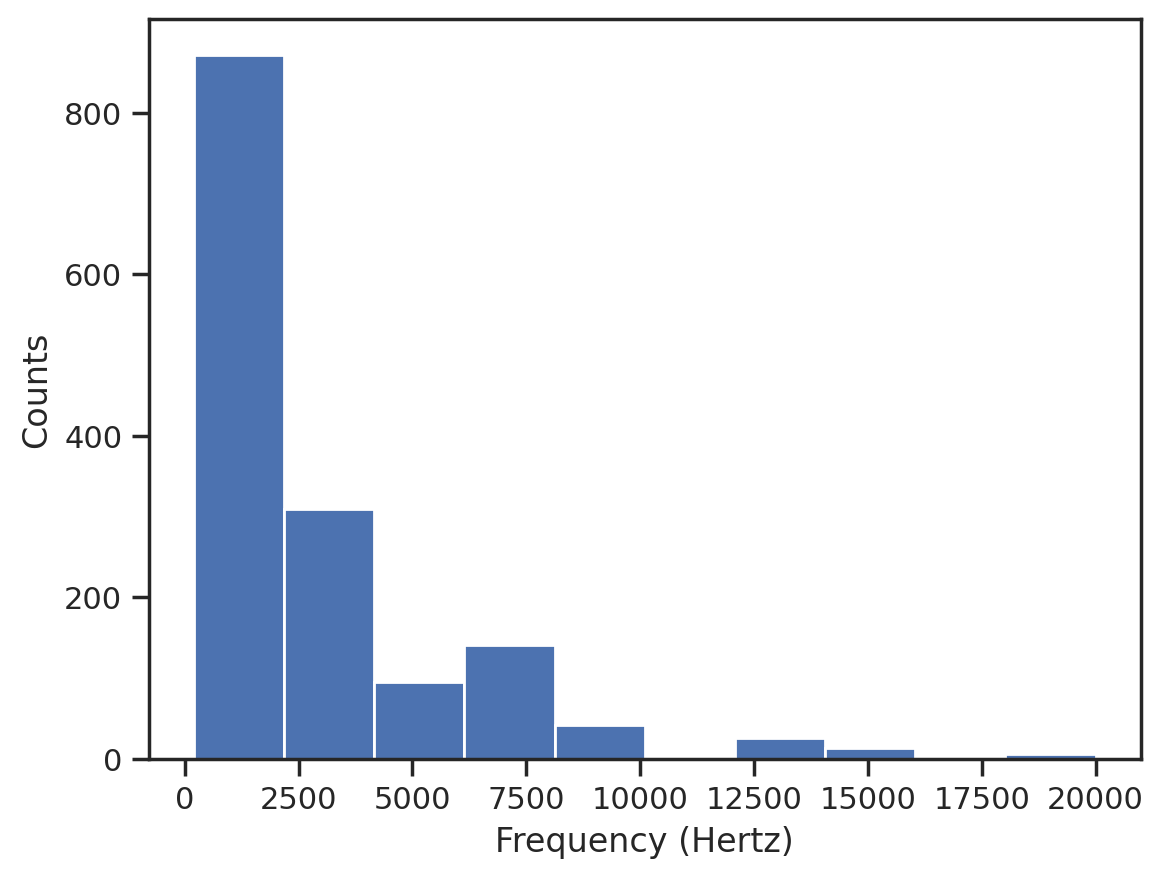

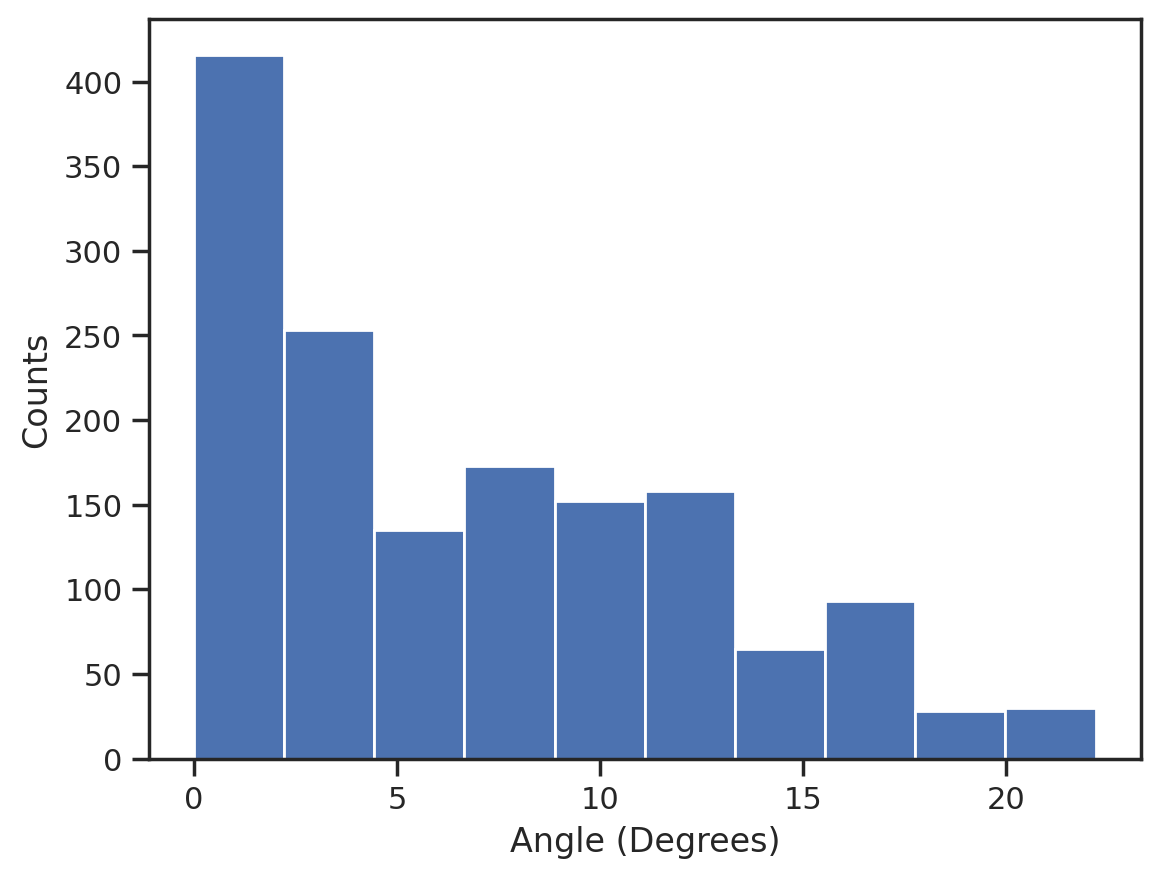

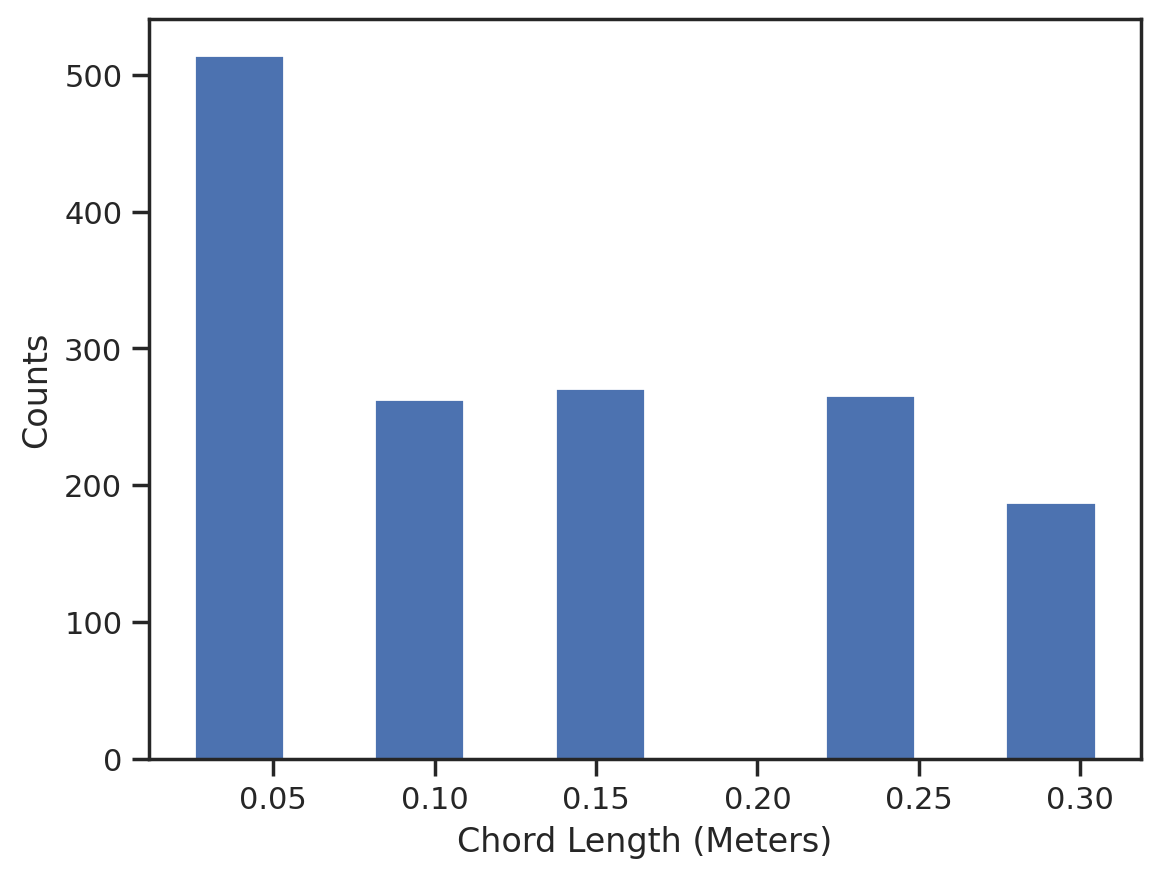

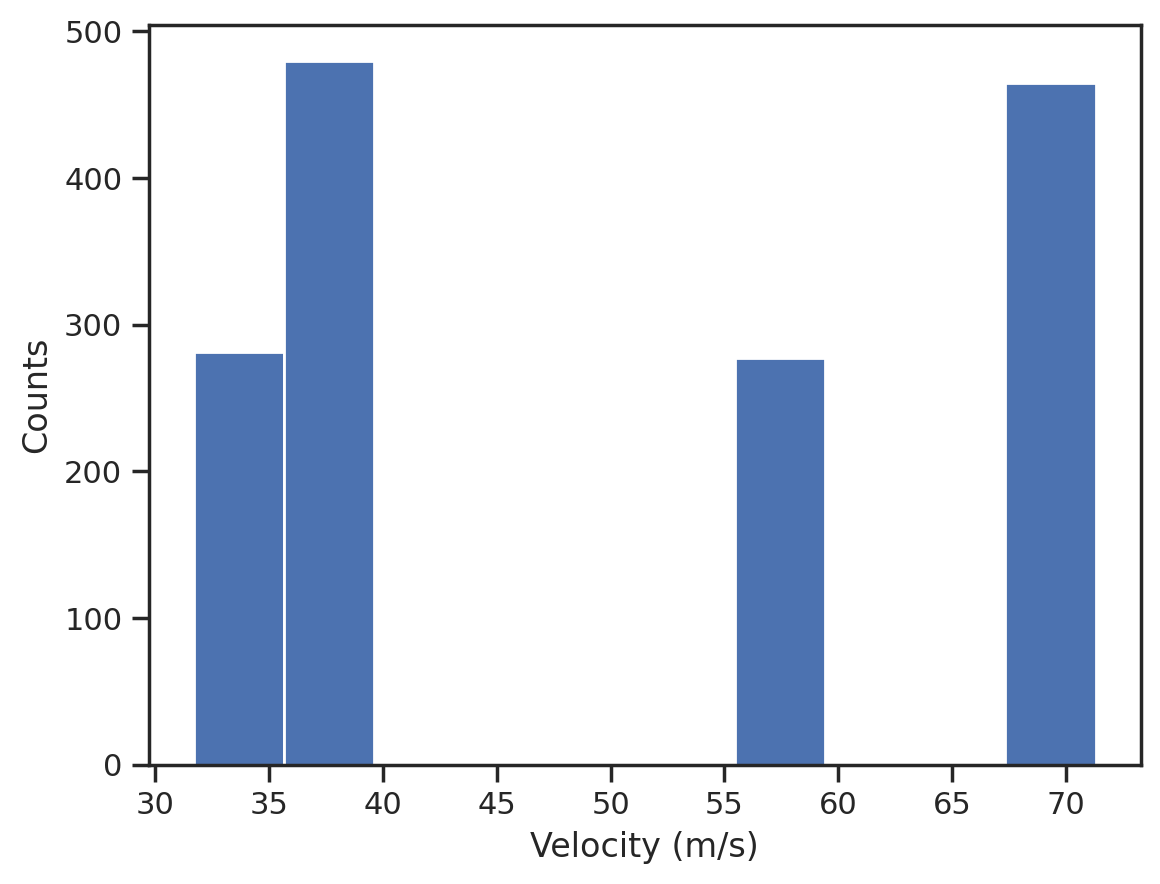

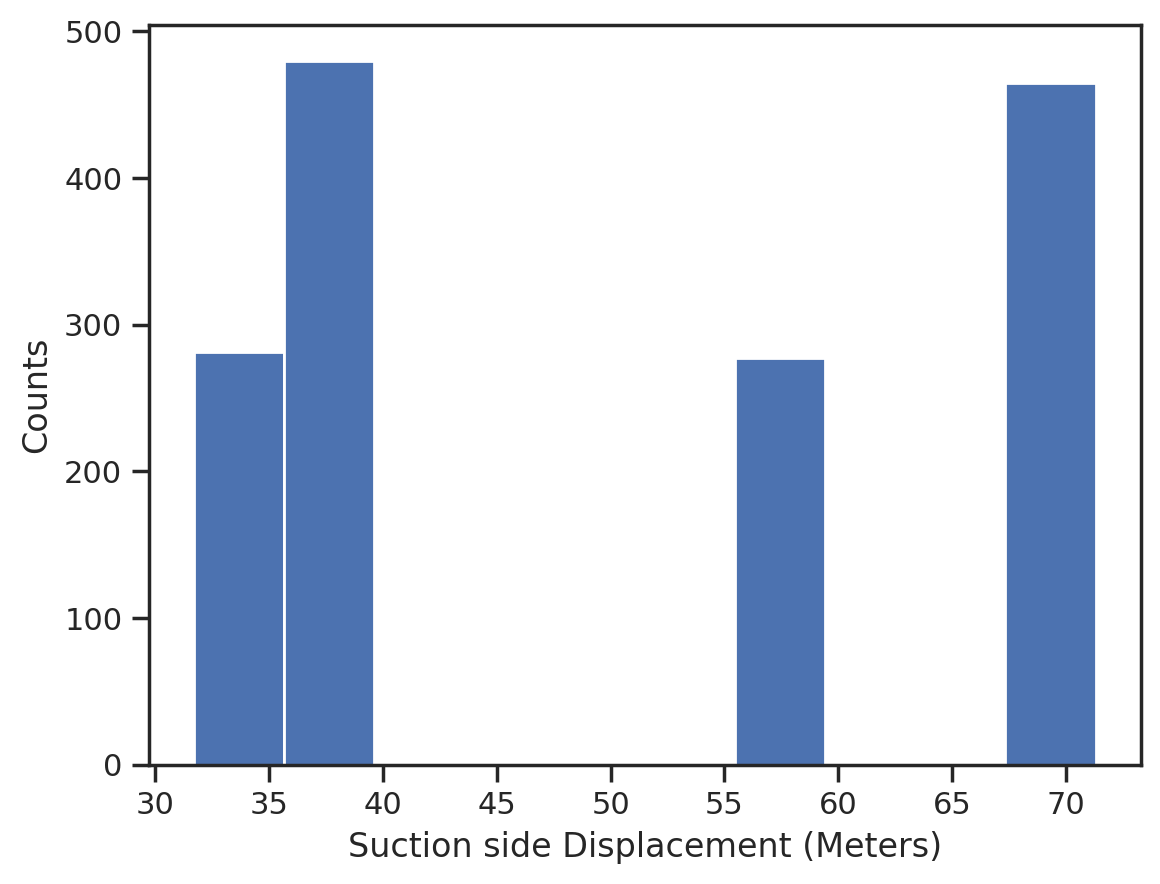

In [ ]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Plots - each is a separate figure
fig, freq = plt.subplots()
freq.hist(df['Frequency'])
freq.set_xlabel('Frequency (Hertz)')
freq.set_ylabel('Counts')
plt.show()

fig, ang = plt.subplots()
ang.hist(df['Angle_of_attack'])
ang.set_xlabel('Angle (Degrees)')
ang.set_ylabel('Counts')
plt.show()

fig, cl = plt.subplots()
cl.hist(df['Chord_length'])
cl.set_xlabel('Chord Length (Meters)')
cl.set_ylabel('Counts')
plt.show()

fig, vel = plt.subplots()
vel.hist(df['Velocity'])
vel.set_xlabel('Velocity (m/s)')
vel.set_ylabel('Counts')
plt.show()

fig, suc = plt.subplots()
suc.hist(df['Velocity'])
suc.set_xlabel('Suction side Displacement (Meters)')
suc.set_ylabel('Counts')
plt.show()

+ Do the scatter plot between all input variables. This will give you an idea of the range of experimental conditions. Are there any holes in the experimental dataset, i.e., places where you have no data?

"\nfig, ax = plt.subplots()\nax.scatter(df['Frequency'], df['Angle_of_attack'])\nax.set_xlabel('Frequency (Hertz)')\nax.set_ylabel('Angle (Degrees)')\nplt.show()\n\nfig, ax = plt.subplots()\nax.scatter(df['Frequency'], df['Chord_length'])\nax.set_xlabel('Frequency (Hertz)')\nax.set_ylabel('Chord Length (Meters)')\nplt.show()\n\nfig, ax = plt.subplots()\nax.scatter(df['Frequency'], df['Velocity'])\nax.set_xlabel('Frequency (Hertz)')\nax.set_ylabel('Velocity (m/s)')\nplt.show()\n\nfig, ax = plt.subplots()\nax.scatter(df['Frequency'], df['Suction_thickness'])\nax.set_xlabel('Frequency (Hertz)')\nax.set_ylabel('Suction side Displacement (Meters)')\nplt.show()\n\nfig, ax = plt.subplots()\nax.scatter(df['Angle_of_attack'], df['Chord_length'])\nax.set_xlabel('Angle (Degrees)')\nax.set_ylabel('Chord Length (Meters)')\nplt.show()\n\nfig, ax = plt.subplots()\nax.scatter(df['Angle_of_attack'], df['Velocity'])\nax.set_xlabel('Angle (Degrees)')\nax.set_ylabel('Velocity (m/s)')\nplt.show()\n\nfig, a

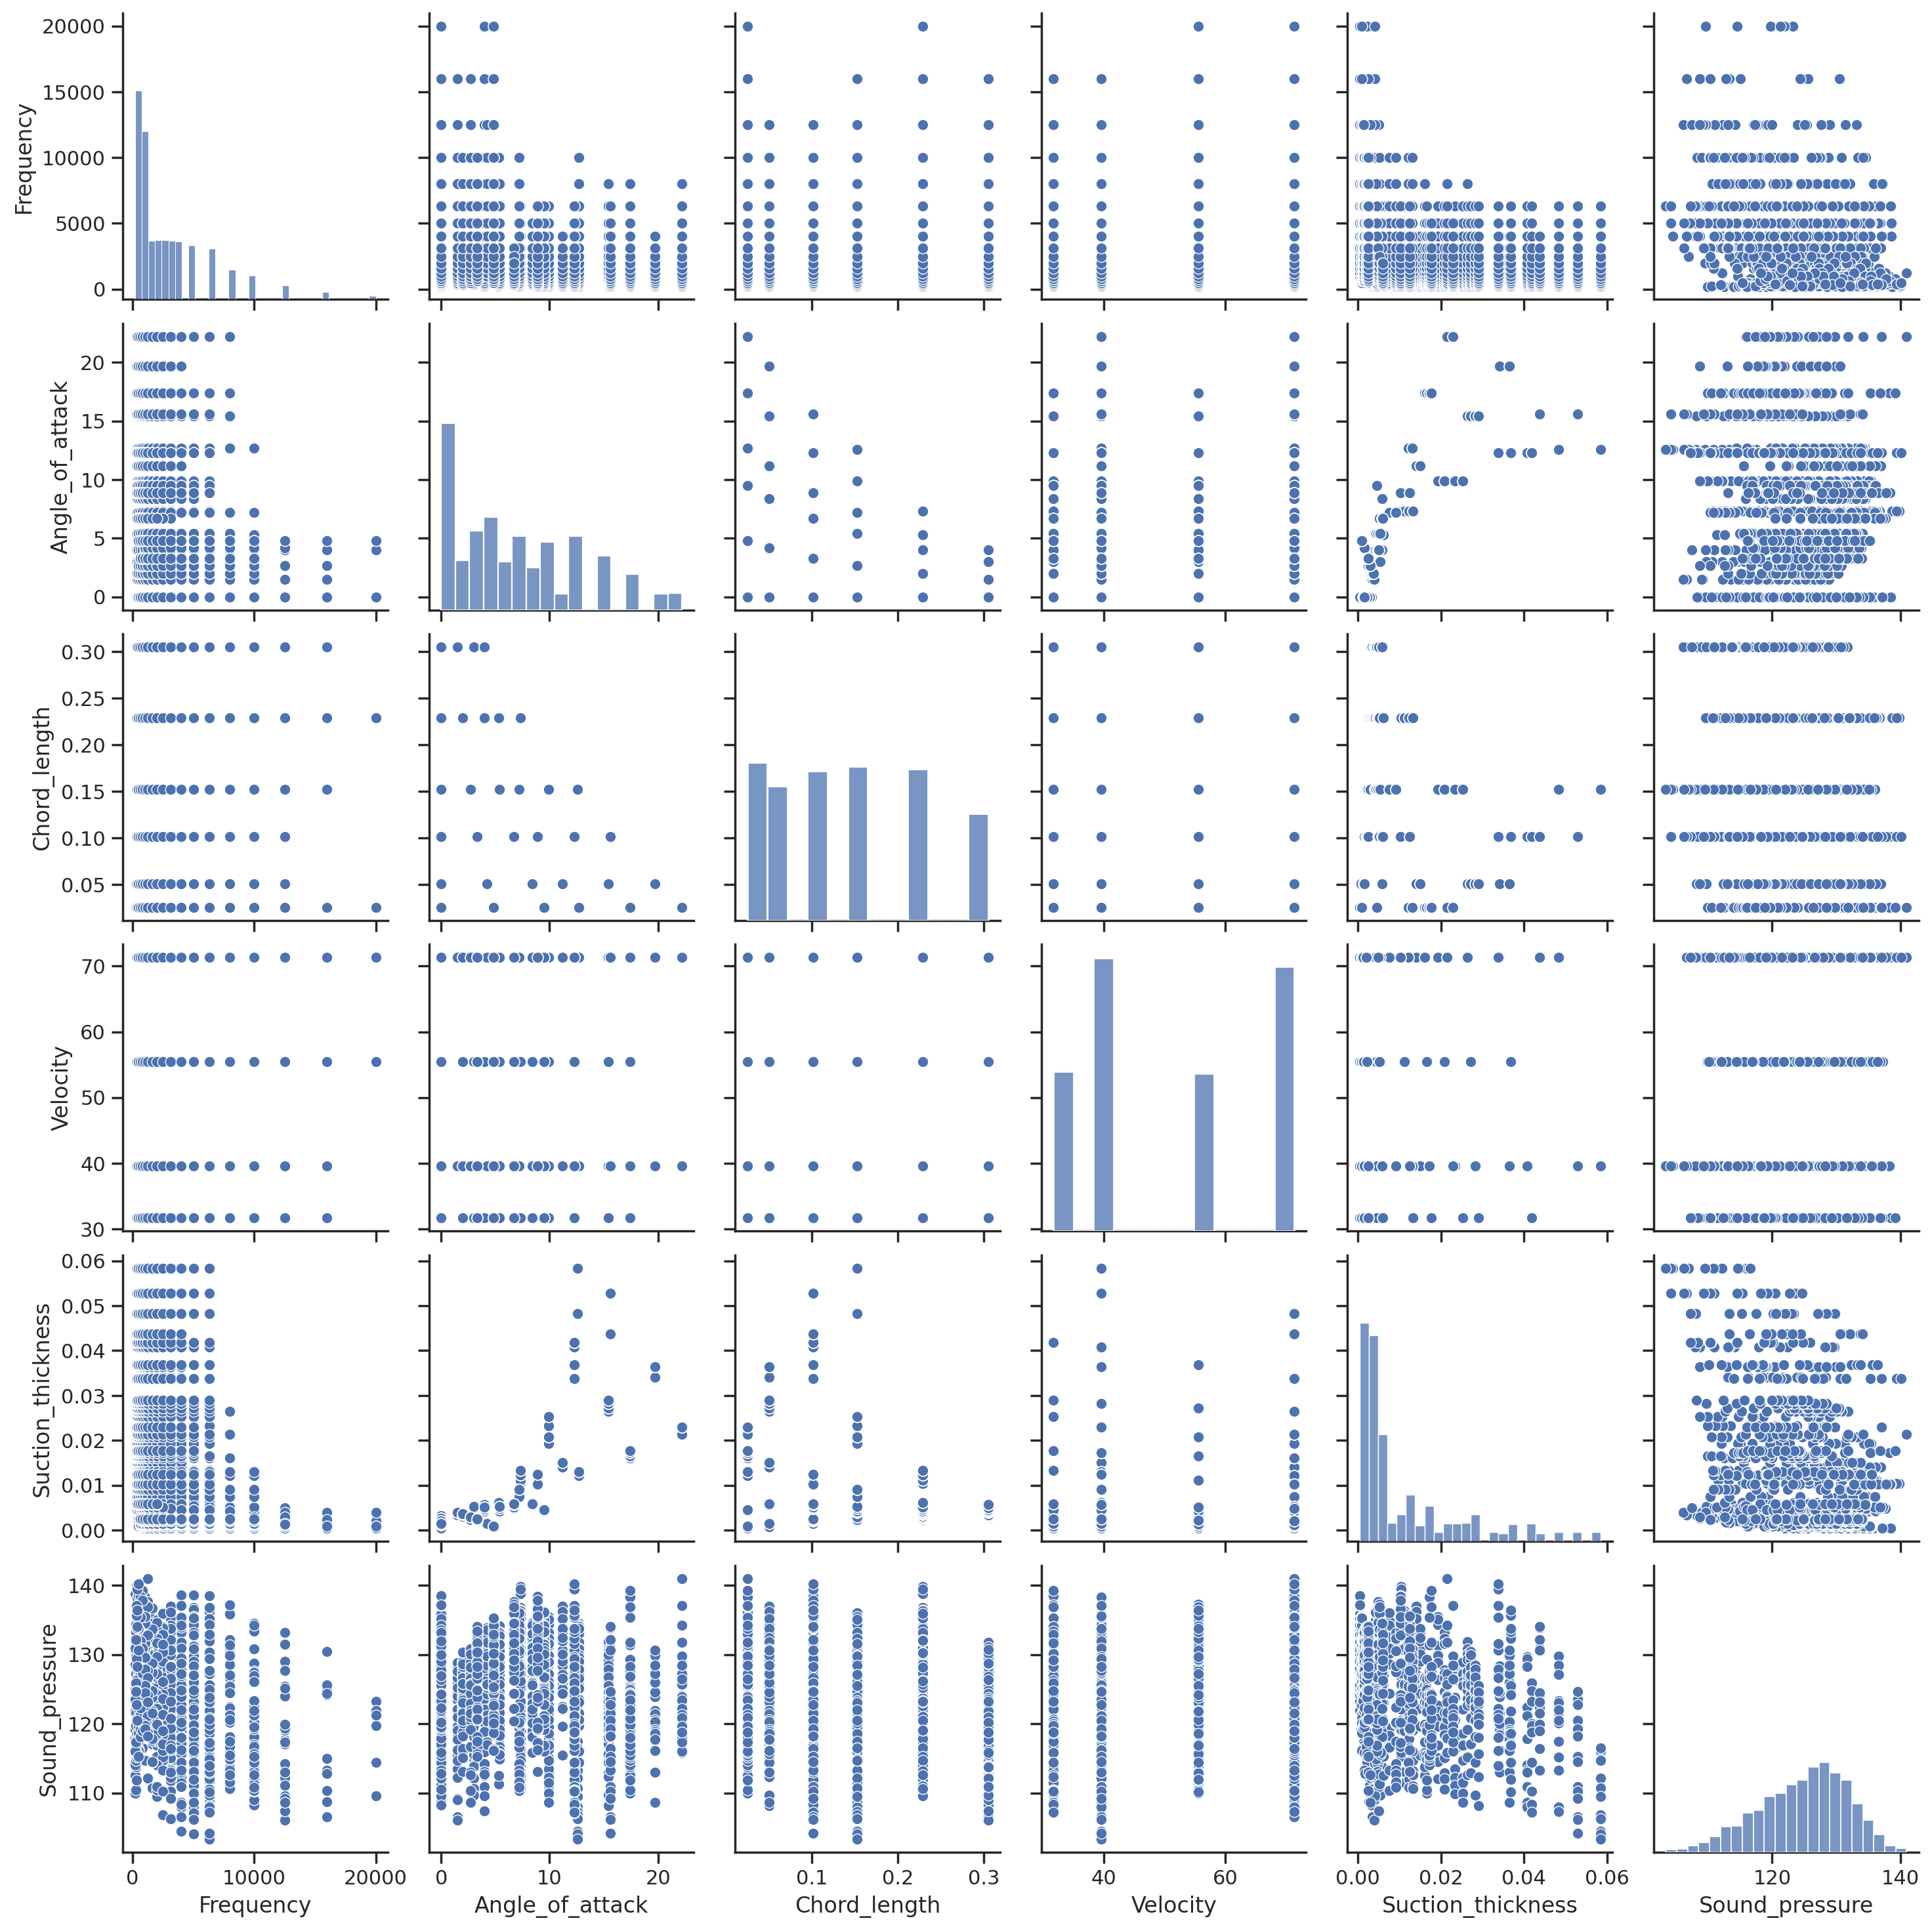

In [ ]:
#Researched Seaborn for how to use it to plot all graphs, figured out it was pretty simple!
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
# I originally did the code below before the brightspace announcement, replaced with simpler code above


'''
fig, ax = plt.subplots()
ax.scatter(df['Frequency'], df['Angle_of_attack'])
ax.set_xlabel('Frequency (Hertz)')
ax.set_ylabel('Angle (Degrees)')
plt.show()

fig, ax = plt.subplots()
ax.scatter(df['Frequency'], df['Chord_length'])
ax.set_xlabel('Frequency (Hertz)')
ax.set_ylabel('Chord Length (Meters)')
plt.show()

fig, ax = plt.subplots()
ax.scatter(df['Frequency'], df['Velocity'])
ax.set_xlabel('Frequency (Hertz)')
ax.set_ylabel('Velocity (m/s)')
plt.show()

fig, ax = plt.subplots()
ax.scatter(df['Frequency'], df['Suction_thickness'])
ax.set_xlabel('Frequency (Hertz)')
ax.set_ylabel('Suction side Displacement (Meters)')
plt.show()

fig, ax = plt.subplots()
ax.scatter(df['Angle_of_attack'], df['Chord_length'])
ax.set_xlabel('Angle (Degrees)')
ax.set_ylabel('Chord Length (Meters)')
plt.show()

fig, ax = plt.subplots()
ax.scatter(df['Angle_of_attack'], df['Velocity'])
ax.set_xlabel('Angle (Degrees)')
ax.set_ylabel('Velocity (m/s)')
plt.show()

fig, ax = plt.subplots()
ax.scatter(df['Angle_of_attack'], df['Suction_thickness'])
ax.set_xlabel('Angle (Degrees)')
ax.set_ylabel('Suction side Displacement (Meters)')
plt.show()

fig, ax = plt.subplots()
ax.scatter(df['Chord_length'], df['Velocity'])
ax.set_xlabel('Chord Length (Meters)')
ax.set_ylabel('Velocity (m/s)')
plt.show()

fig, ax = plt.subplots()
ax.scatter(df['Chord_length'], df['Suction_thickness'])
ax.set_xlabel('Chord Length (Meters)')
ax.set_ylabel('Suction side Displacement (Meters)')
plt.show()

fig, ax = plt.subplots()
ax.scatter(df['Velocity'], df['Suction_thickness'])
ax.set_xlabel('Velocity (m/s)')
ax.set_ylabel('Suction side Displacement (Meters)')
plt.show()
'''

*Your explanation here*

+  Do the scatter plot between each input variable and the output. This will give you an idea of the relationship between each input and the output. Do you observe any obvious patterns?

In [ ]:
# your code here (as many blocks as you like)
print("It looks like suction thickness and angle of attack have somewhat of a relationship (it seemes to be an exponential increase), potentially the oppisite with frequency and suction thickeness.")

It looks like suction thickness and angle of attack have somewhat of a relationship (it seemes to be an exponential increase), potentially the oppisite with frequency and suction thickeness.


*Your explanation here*

+ Now pick the two input variables you think are the most important and do the scatter plot between them using the output to color the points (see the last question of Problem 1). Feel free to repeat it with more than two pairs of inputs if you want. Briefly discuss your findings.

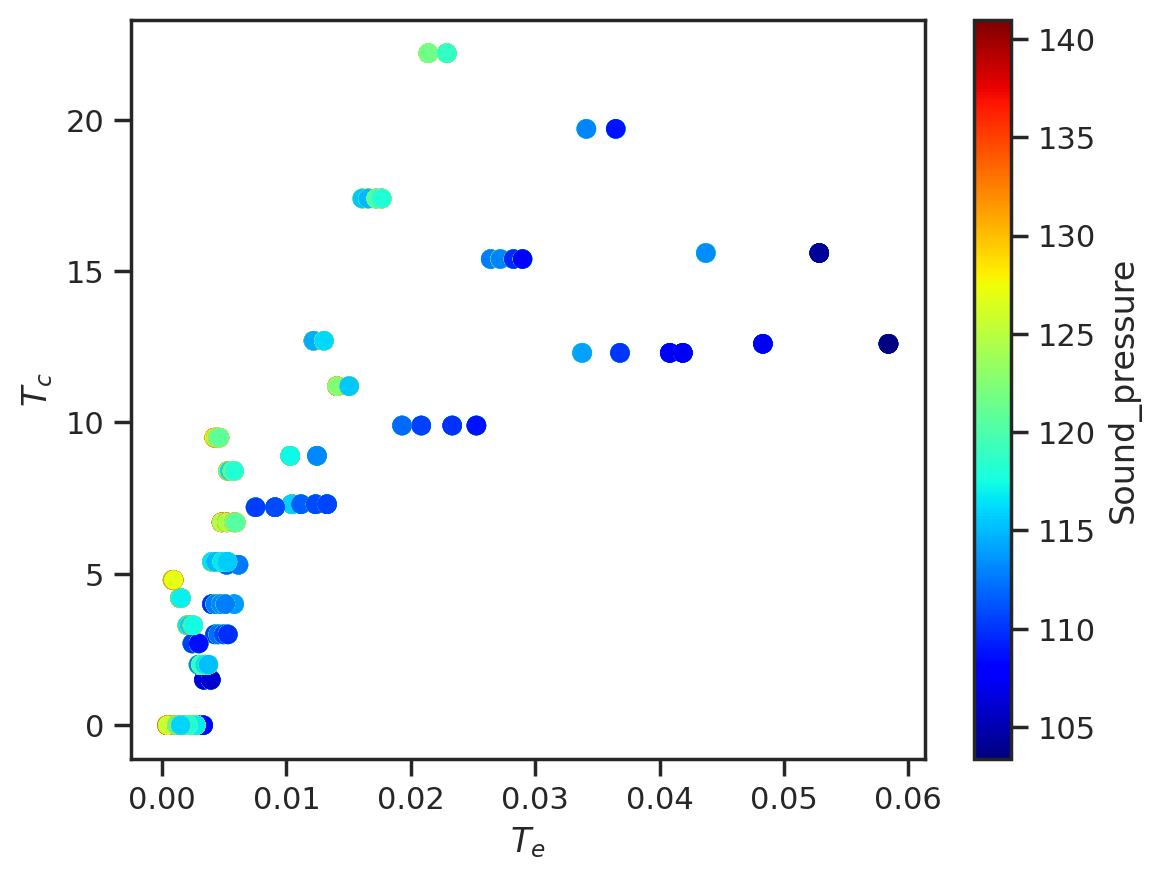

In [ ]:
# your code here (as many blocks as you like)
from matplotlib import cm
fig, ax = plt.subplots()
cs = ax.scatter(df['Suction_thickness'], df['Angle_of_attack'], # So far a standard scatter plot
                c=df['Sound_pressure'], # This is telling matplotlib what the color
                                 # of the points should be
                cmap=cm.jet      # This is saying to use the jet colormap
                                 # (blue = smallest values, red = highest values)
               )
plt.colorbar(cs, label='Sound_pressure')   # This gives us a colorbar
ax.set_xlabel('$T_e$')
ax.set_ylabel('$T_c$');

*Your explanation here*

In [ ]:
print("After checking at office hours this is the closest relationship I could come up with. There is some relationship between Te and Tc that looks exponential with sound pressure increasing on the left side of the curve (Mainly the lower sound pressure stays on the bottom side of the curve.) Overall it was fun just messing with the parameters and seeing where the colors lined up with any curves that could be seen from collected data")

After checking at office hours this is the closest relationship I could come up with. There is some relationship between Te and Tc that looks exponential with sound pressure increasing on the left side of the curve (Mainly the lower sound pressure stays on the bottom side of the curve.) Overall it was fun just messing with the parameters and seeing where the colors lined up with any curves that could be seen from collected data
